# Importando as bibliotecas necessárias

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Carregando um conjunto de dados de exemplo

In [35]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv"
df = pd.read_csv(url, header=None)

# Preparando os dados

In [36]:
X = df.values[:, :-1]
y = df.values[:, -1]

# Convertendo rótulos para numéricos

In [37]:
y = (y == 'g').astype(int)

# Dividindo os dados em conjuntos de treino e teste

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando os dados

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Contruindo o modelo de rede neural

In [40]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilando o modelo

In [41]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Treinando o modelo

In [42]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
8/8 [==============================] - 1s 25ms/step - loss: 0.6832 - accuracy: 0.5079 - val_loss: 0.5759 - val_accuracy: 0.7857
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 0.5390 - accuracy: 0.7897 - val_loss: 0.4635 - val_accuracy: 0.8214
Epoch 3/10
8/8 [==============================] - 0s 5ms/step - loss: 0.4465 - accuracy: 0.8373 - val_loss: 0.3980 - val_accuracy: 0.8571
Epoch 4/10
8/8 [==============================] - 0s 6ms/step - loss: 0.3821 - accuracy: 0.8611 - val_loss: 0.3495 - val_accuracy: 0.8571
Epoch 5/10
8/8 [==============================] - 0s 6ms/step - loss: 0.3315 - accuracy: 0.8690 - val_loss: 0.3215 - val_accuracy: 0.8571
Epoch 6/10
8/8 [==============================] - 0s 5ms/step - loss: 0.2878 - accuracy: 0.8849 - val_loss: 0.3062 - val_accuracy: 0.8571
Epoch 7/10
8/8 [==============================] - 0s 6ms/step - loss: 0.2551 - accuracy: 0.9048 - val_loss: 0.2934 - val_accuracy: 0.8929
Epoch 8/10
8/8 [=================

# avaliando o modelo

In [43]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.2f}")

3/3 [==============================] - 0s 2ms/step - loss: 0.2862 - accuracy: 0.9296
Test accuracy: 0.93


# Plotando a curva de aprendizado

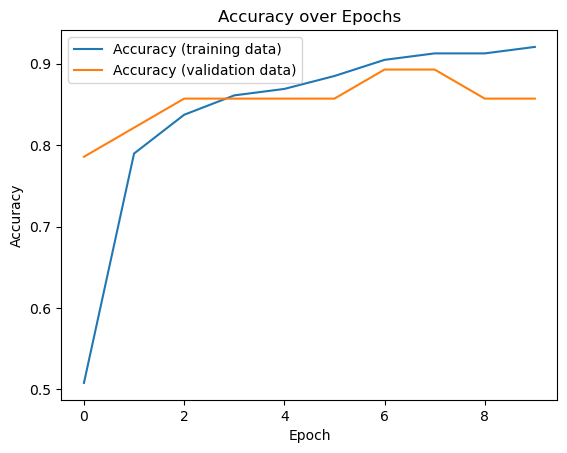

In [45]:
plt.plot(history.history['accuracy'], label='Accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
plt.title('Accuracy over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()